References: SCD07.pdf pages 26

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from os import environ
from NikolaevskyGPU_Batch import NE
import torch

In [2]:
DOMAIN_SIZE = 50*np.pi
N_DOF = 512
DT = 0.05
# r = np.linspace(0.0, 0.5, 300)
r = np.array([0.27])
v = 0.20 # 0 0.05 0.1 0.15 0.2 0.25

# mesh = np.linspace(0, DOMAIN_SIZE, N_DOF, endpoint=False)
# mesh = np.tile(mesh, (len(r),1))
# u_0 = 12*(r.reshape(-1,1)**0.5)*np.cos(mesh)
np.random.seed(42)
u_0 = np.random.randn(N_DOF)
u_0 = np.tile(u_0, (len(r),1))

nke = NE(L=DOMAIN_SIZE, N=N_DOF, h=DT, u_0=u_0, r=r, v=v, precompute_step=round(1000 / DT), device='cuda')

using LSA damping
Stepping until t=1000.0


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:10<00:00, 1923.04it/s]


In [ ]:
LCE = nke.LCE(1, n_forward = round(0 / DT), n_compute = round(1500 / DT))

In [ ]:
import matplotlib
plt.figure(figsize=(30, 10))
plt.plot(r,LCE[0].cpu())
plt.plot(r,np.load("LCE0,25.npy")[:,0])
plt.legend(["random","old"])
# Add major gridlines
plt.grid(which='major', color='blue', linestyle='-', linewidth=0.5)

# Add minor gridlines
plt.grid(which='minor', color='gray', linestyle='--', linewidth=0.3)

# Customize tick intervals for extra gridlines
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.01))  # Major gridlines every 0.1
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))  # Minor gridlines every 0.02
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1))  # Major gridlines every 0.05
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))  # Minor gridlines every 0.01
# ax.set_ylim([-0.1,0.1])
plt.show()

In [ ]:
for i in range(len(r)):
    print(r[i], i)

In [3]:
# nke.forward(round(0 / DT), False)
trj = nke.forward(round(2000 / DT), True)

100%|███████████████████████████████████████████████████████████████████████████| 40000/40000 [00:24<00:00, 1608.80it/s]


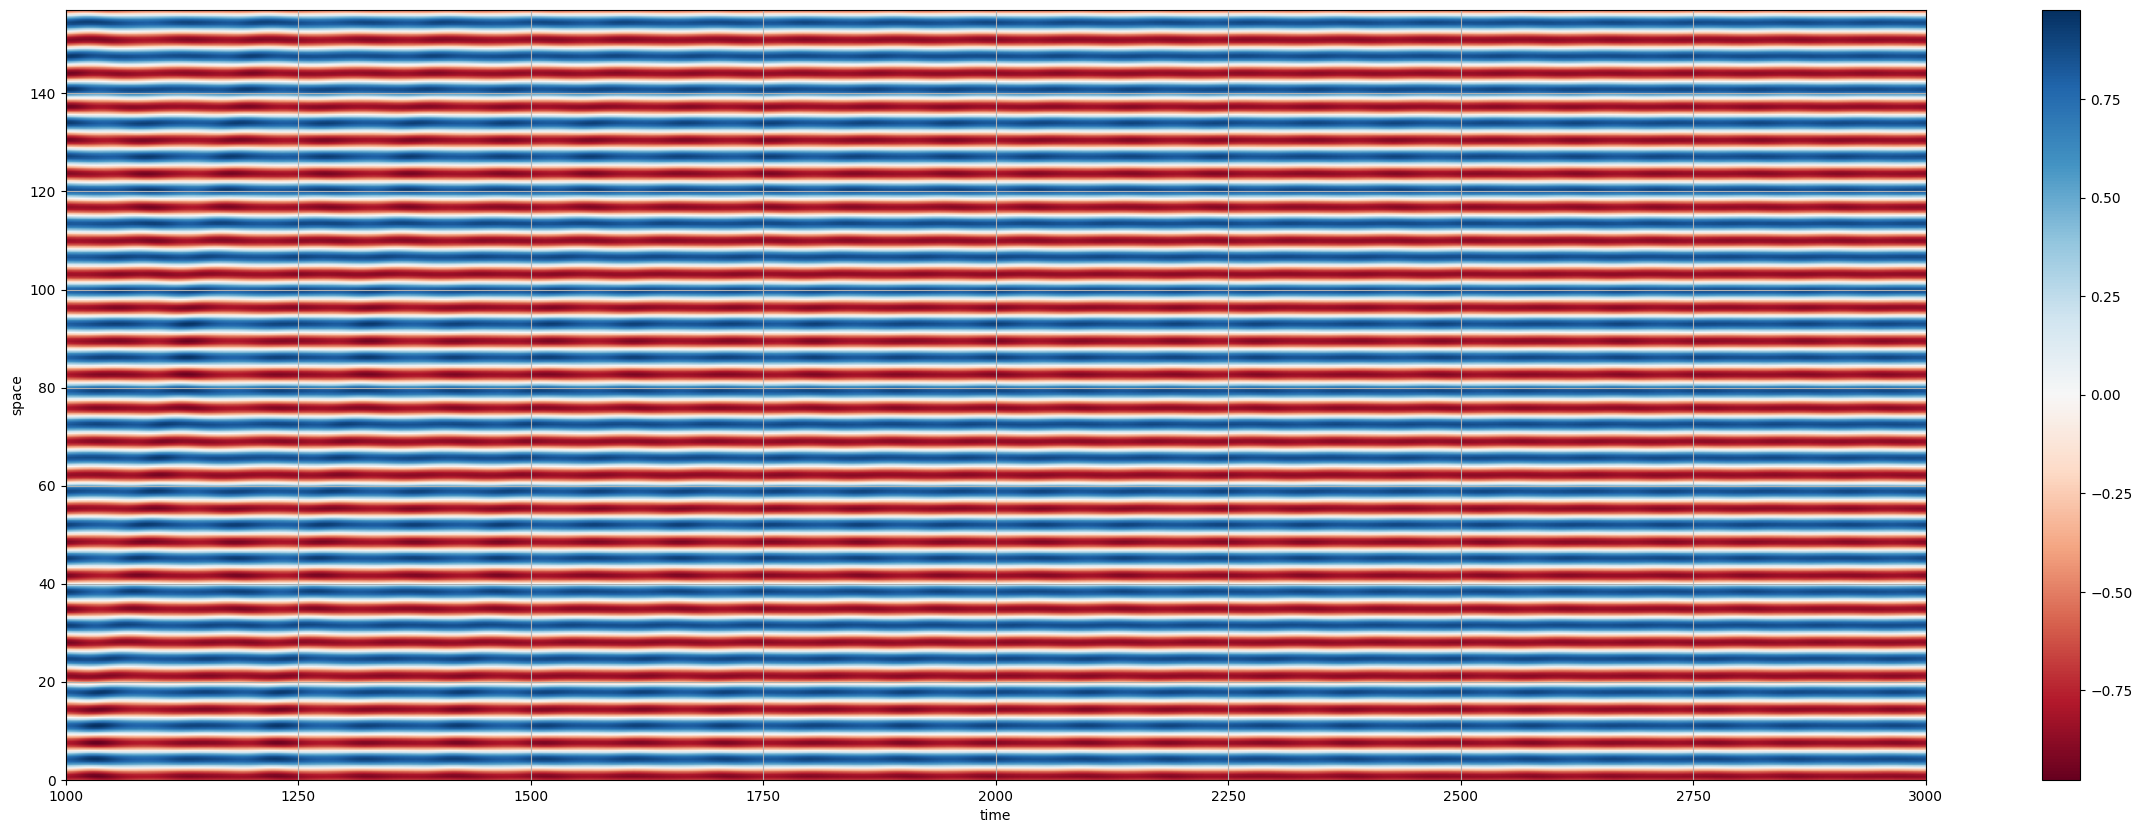

In [4]:
batch = 0
plt.figure(figsize=(30, 10))
plt.imshow(
    trj[batch].T.cpu(),
    cmap="RdBu",
    aspect="auto",
    origin="lower",
    extent=(nke.t - (len(trj[batch])-1)*nke.h, nke.t, 0, nke.L),
)
plt.colorbar()
plt.xlabel("time")
plt.ylabel("space")
plt.grid()

In [ ]:
for i in range(len(r)):
    print(r[i])
    plt.figure(figsize=(10, 5))
    plt.imshow(
        trj[i].T.cpu(),
        cmap="RdBu",
        aspect="auto",
        origin="lower",
        extent=(nke.t - (len(trj[i])-1)*nke.h, nke.t, 0, nke.L),
    )
    plt.colorbar()
    plt.xlabel("time")
    plt.ylabel("space")
    plt.grid()
    plt.show()

/tmp/ipykernel_609/445223198.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3683.)
  plt.plot(trj.T[0].cpu())


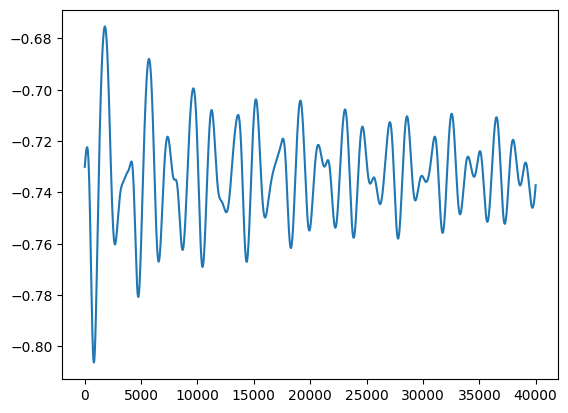

In [5]:
plt.plot(trj.T[0].cpu())

In [ ]:
plt.plot(trj[batch].T[0].cpu(),np.gradient(trj[batch].T[0].cpu()))

In [ ]:
LCE = nke.LCE(8, n_forward = round(0 / DT), n_compute = round(5000 / DT))

In [ ]:
import pandas as pd

In [ ]:
arr = pd.read_csv("data - Copy.csv").values[:,2]

In [ ]:
arr

In [ ]:
plt.plot(arr)
plt.ylim(-1,1)

In [ ]:
arrmod = np.array([np.sum(i) for i in arr])

In [ ]:
n_pos = int(np.sum(arrmod > 0.))
n_neg = int(np.sum(arrmod < 0.))
print("Number of positive exponents: {}".format(n_pos))
print("Number of negative exponents: {}".format(n_neg))

In [ ]:
nonchaosL = []
chaosL = []
for d,l in zip(pd.read_csv("data - Copy.csv").values[:,0], arrmod):
    if l < 0:
        nonchaosL.append(d)
    if l > 0:
        chaosL.append(d)
        
import random
random.shuffle(nonchaosL)
random.shuffle(chaosL)
chaosL = chaosL[:71]
print(f"chaos: {len(chaosL)} nonchaos: {len(nonchaosL)}")

In [ ]:
nonchaosL

In [ ]:
chaosL

In [ ]:
import multiprocess as mp
import random
##CREATE DATA

In [ ]:
r = random.choice([i for i in np.linspace(0.05,0.1,20)])
def create_data(r):
    import numpy as np
    from Nikolaevsky import NE
    import random
    
    DOMAIN_SIZE = 50*np.pi
    N_DOF = 256
    DT = 0.1
    x = random.choice([i for i in range(N_DOF)])
    length = round(4000/DT)
    
    mesh = np.linspace(0, DOMAIN_SIZE, N_DOF, endpoint=False)
    u_0 = 11.996496496496496*(r**0.5)*np.cos(mesh)
    nke = NE(L=DOMAIN_SIZE, N=N_DOF, h=DT, u_0=u_0, r=r, alpha=1.5, beta=0)
    nke.forward(round(7000/DT),False)
    trj = nke.forward(length, True)
    return trj.T[x]

In [ ]:
data = create_data(chaosr[99])

In [ ]:
plt.plot(data)

In [ ]:
datachaos = []
datanonchaos = []

numdata = 200
nonchaoslimit = (0.05,0.1)
chaoslimit = (0.12,0.17)
nonchaosr = [random.choice([i for i in np.linspace(nonchaoslimit[0],nonchaoslimit[1],1000)]) for i in range(numdata)]
chaosr = [random.choice([i for i in np.linspace(chaoslimit[0],chaoslimit[1],1000)]) for i in range(numdata)]
    
pool = mp.Pool(processes=10)
for i in tqdm(pool.imap(create_data, [i for i in nonchaosr]), total=len(nonchaosr)):
    datanonchaos.append(i)
datanonchaos = np.array(datanonchaos)
for i in tqdm(pool.imap(create_data, [i for i in chaosr]), total=len(chaosr)):
    datachaos.append(i)
datachaos = np.array(datachaos)

In [ ]:
plt.plot(datachaos[0])

In [ ]:
datachaos.shape

In [ ]:
datanonchaos.shape

In [ ]:
ydatachaos = np.array([1 for i in range(len(datachaos))])[:, np.newaxis]
ydatanonchaos = np.array([0 for i in range(len(datanonchaos))])[:, np.newaxis]

In [ ]:
X = np.concatenate((datachaos, datanonchaos))
Y = np.concatenate((ydatachaos, ydatanonchaos))

In [ ]:
del datanonchaos
del datachaos

In [ ]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf

In [ ]:
input = tf.keras.layers.Input((None, 1))
lstm_layer = tf.keras.layers.LSTM(128,return_sequences=True)(input)
lstm_layer = tf.keras.layers.LSTM(128)(lstm_layer)
lstm_layer = tf.keras.layers.Dropout(0.25)(lstm_layer)
output = tf.keras.layers.Dense(32, activation="ReLU")(lstm_layer)
output = tf.keras.layers.Dense(1, activation="sigmoid")(output)

model = tf.keras.Model([input],[output])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', metrics=["accuracy"], loss="binary_crossentropy")

In [ ]:
# with tf.device('/cpu:0'):
#    Xtrain = tf.convert_to_tensor(Xtrain, np.float32)
#    Ytrain = tf.convert_to_tensor(Ytrain, np.float32)
#    Xval = tf.convert_to_tensor(Xval, np.float32)
#    Yval = tf.convert_to_tensor(Yval, np.float32)

In [ ]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=8, epochs=10)

In [ ]:
chaosr

In [ ]:
nonchaosr

In [ ]:
def create_data(r):
    import numpy as np
    from Nikolaevsky import NE
    import random
    
    DOMAIN_SIZE = 50*np.pi
    N_DOF = 256
    DT = 0.1
    x = random.choice([i for i in range(N_DOF)])
    length = round(5000/DT)
    
    mesh = np.linspace(0, DOMAIN_SIZE, N_DOF, endpoint=False)
    u_0 = 11.996496496496496*(r**0.5)*np.cos(mesh)
    nke = NE(L=DOMAIN_SIZE, N=N_DOF, h=DT, u_0=u_0, r=r, alpha=1.5, beta=0)
    nke.forward(round(7000/DT),False)
    trj = nke.forward(length, True)
    return trj.T[x]

In [ ]:
data = create_data(0.05)

In [ ]:
plt.plot(data)

In [ ]:
model.predict(data[np.newaxis,:,np.newaxis])

In [ ]:
import torch
import numpy as np

In [ ]:
array1 = np.array([1,2,3,4,5])
array2 = np.array([1,2,6,4,5])

array3 = np.array([5,2,3,4,5])
array4 = np.array([5,2,3,4,5])

In [ ]:
array1 @ array3

In [ ]:
array2 @ array4

In [ ]:
np.array([array1,array2]) @ np.array([array3,array4])

In [ ]:
torch.diag(torch.tensor(array1))

In [ ]:
torch.diag(torch.tensor(array2))

In [ ]:
torch.diag_embed(torch.tensor([array1,array2]))

In [ ]:
torch.fft.rfft(torch.tensor(array1))

In [ ]:
torch.fft.rfft(torch.tensor(array2))

In [ ]:
torch.fft.rfft(torch.tensor([array1,array2]))

In [ ]:
torch.tensor(np.fft.rfftfreq(n=self.N, d=L / (self.N * 2 * np.pi)))

In [ ]:
(torch.tensor(array1) < 2 / 3 * torch.max(torch.tensor(array1)))

In [ ]:
(torch.tensor(array2) < 2 / 3 * torch.max(torch.tensor(array2)))

In [ ]:
(torch.tensor([array1,array2]) < 2 / 3 * torch.max(torch.tensor([array1,array2])))

In [ ]:
array1 * array3

In [ ]:
array2 * array4

In [ ]:
torch.tensor([array1,array2]) * torch.tensor([array3,array4])

In [ ]:
torch.where(
    abs(torch.tensor(array1)) <= 3,
    10 / 2,
    (torch.tensor(array1) - 1.0) / torch.tensor(array1),
)

In [ ]:
torch.where(
    abs(torch.tensor(array2)) <= 3,
    10 / 2,
    (torch.tensor(array2) - 1.0) / torch.tensor(array2),
)

In [ ]:
torch.where(
    abs(torch.tensor([array1,array2])) <= 3,
    10 / 2,
    (torch.tensor([array1,array2]) - 1.0) / torch.tensor([array1,array2]),
)

In [ ]:
a = torch.tensor(array1)
a.repeat(5,1).shape[0]

In [ ]:
torch.stack()

In [ ]:
a